In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline


/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [12]:
# df = pd.read_excel("combinedData.xlsx")
dfTest = pd.read_csv('rawData.csv')
df = pd.read_csv('Fortnite.csv')
df = df.rename(index=str, columns={"Which quadrant did you land in? Use map below for reference": "Location", "Which game mode were you in?": "Mode","What place did you finish? (Example: 4)": "Position", "How many kills did you get? (Example: 7)": "KillCount"})

In [3]:
df.head()

,Timestamp,Location,Mode,Position,KillCount
0,2018/03/05 7:16:09 PM EST,D5,Solo,6,8
1,2018/03/05 7:43:32 PM EST,G2,Solo,1,3
2,2018/03/05 7:44:48 PM EST,F8,Solo,6,3
3,2018/03/05 7:54:54 PM EST,A9,Solo,5,7
4,2018/03/05 8:00:04 PM EST,D10,Solo,60,1


In [13]:
df = df.drop('Timestamp', axis = 1)

In [14]:
df.isnull().any()

Location     False
Mode         False
Position     False
KillCount    False
dtype: bool

In [35]:
df.Mode.replace(to_replace=dict(SOLO=0, DUO=1, SQUAD=2, Solo=0, Duo =1, Squad = 2), inplace=True)
dfTest.Mode.replace(to_replace=dict(SOLO=0, DUO=1, SQUAD=2, Solo=0, Duo =1, Squad = 2), inplace=True)

In [16]:
df = df[["Location", "KillCount", "Position", "Mode"]]
# df["KillCount"] = np.cos(2*np.pi*df.KillCount/100)
# df["Position"] = np.cos(2*np.pi*df.Position/100)
# df["Mode"] =  np.cos(2*np.pi*df.Position/3)

In [17]:
df3 = pd.concat([df, dfTest])

In [24]:
df =df3

In [43]:
df=df.drop([20])

In [44]:
df.loc[df['Mode'] == "SQUAD "]

,Location,KillCount,Position,Mode


(-1, 30)

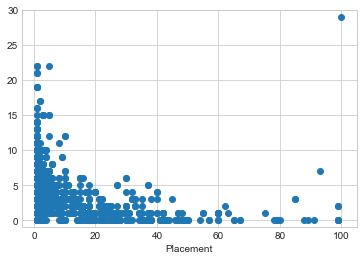

In [45]:
import seaborn as sns

plt.scatter((df["Position"]),(df["KillCount"]))
# plt.ylabel()
plt.xlabel("Placement")
plt.ylim(-1,30)



Text(0.5,0,'Placement')

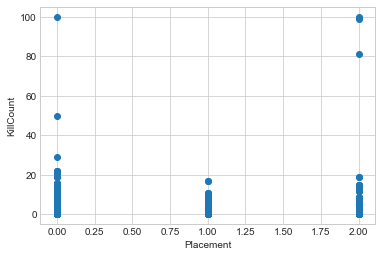

In [46]:
plt.scatter(df["Mode"], df["KillCount"])
plt.ylabel("KillCount")
plt.xlabel("Placement")

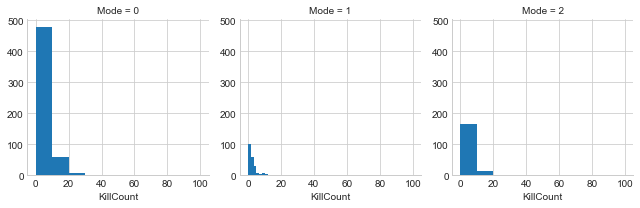

In [47]:
sns.set_style("whitegrid")
multiples = sns.FacetGrid(df, col = "Mode")
multiples = multiples.map(plt.hist, "KillCount")

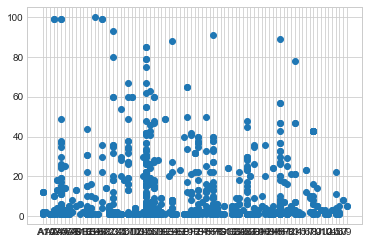

In [48]:
plt.scatter( df["Location"],df["Position"])

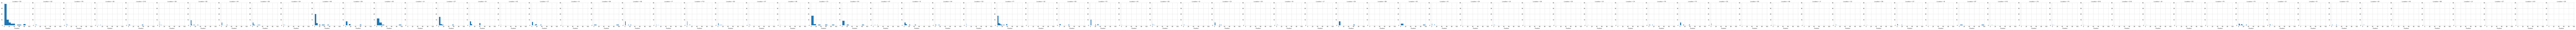

In [23]:
# multiples = sns.FacetGrid(df, col = "Location")
# multiples = multiples.map(plt.hist, "Position")

In [49]:
import statsmodels.api as sm

Y = df["Position"]
X = df[["KillCount", "Mode"]]

model = sm.OLS(Y,X.astype(float)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Position   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     64.15
Date:                Fri, 27 Apr 2018   Prob (F-statistic):           7.66e-27
Time:                        18:32:36   Log-Likelihood:                -4151.8
No. Observations:                 943   AIC:                             8308.
Df Residuals:                     941   BIC:                             8317.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KillCount      0.0722      0.080      0.908      0.3

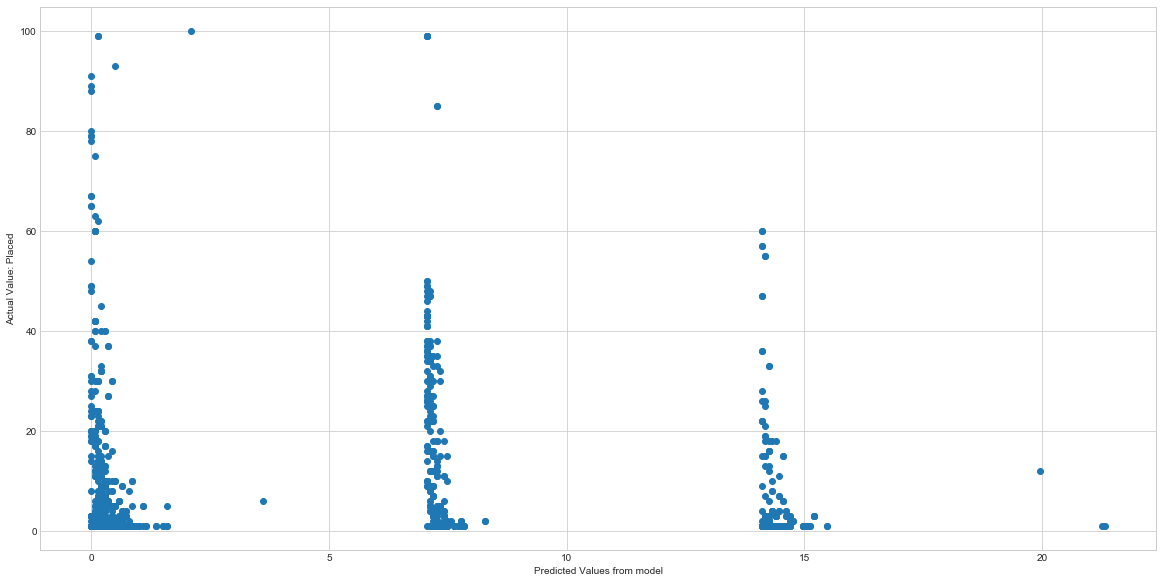

In [50]:
predictions = model.predict(X)
plt.figure(figsize = (20,10))
plt.scatter(predictions, Y)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Value: Placed")
plt.show()

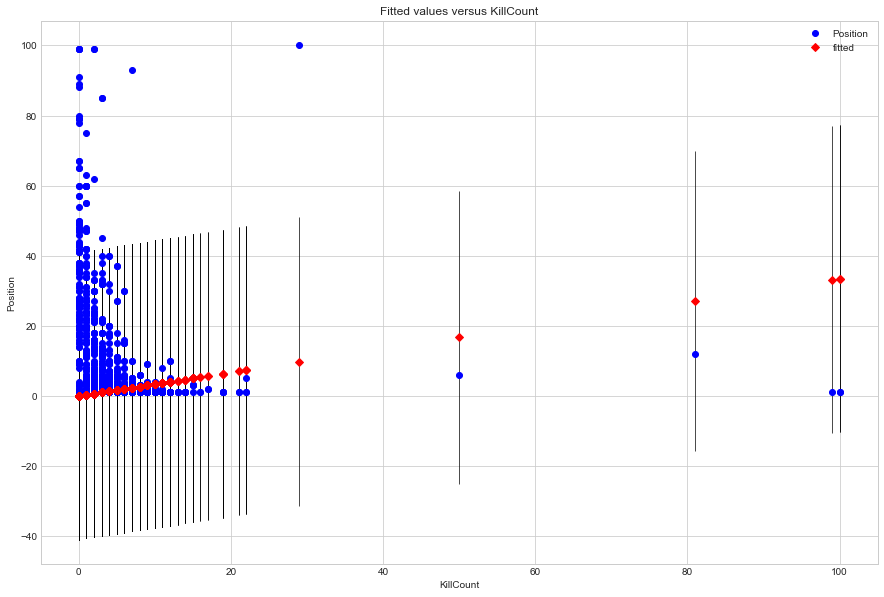

In [51]:
X = df["KillCount"]
Y = df["Position"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)


In [134]:
import sklearn.cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y, test_size = 0.2, random_state = 5) 

In [56]:
from scipy.optimize import curve_fit

In [188]:
def func(x, a, b, c):
    d  = np.array(a * np.exp(-b * x) + c, dtype=np.float64)
    return d

/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


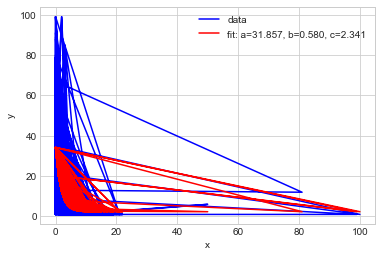

In [189]:
plt.plot(X_train, Y_train, 'b-', label='data')
popt, pcov = curve_fit(func, X_train, Y_train)

plt.plot(X_train, func(X_train, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, X_train, Y_train)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [190]:
popt

array([31.85740778,  0.58023819,  2.34111096])

In [191]:
yhat = popt[0]+ popt[1]*np.exp(popt[2] * X_test)

In [192]:
res = yhat -Y_test

(-1, 65)

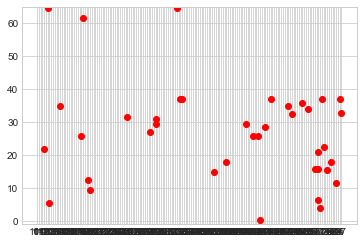

In [193]:
plt.plot(res,'ro')
plt.ylim(-1,65)

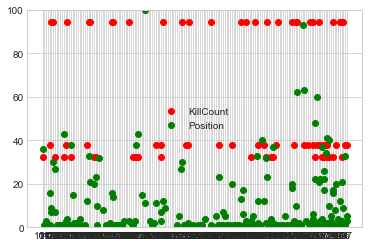

In [194]:
plt.plot(yhat, 'ro')
plt.plot(Y_test, 'go')
plt.ylim(0,100)
plt.legend(loc= 'best')